Import all libraries that may require

In [4]:
import sklearn as sk
import numpy as np
import pandas as pd
import math
import scipy
import matplotlib.pyplot as plt

In [5]:
Fraud_Data = pd.read_csv('creditcard.csv',delimiter=',')
print ('Data imported')

Data imported


In [6]:
Fraud_Data.cov()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,2.255124e+09,1.091960e+04,-8.307031e+02,-3.021425e+04,-7.077378e+03,1.134407e+04,-3.986868e+03,4.976739e+03,-2.095683e+03,-4.518322e+02,...,1.560435e+03,4.964595e+03,1.516599e+03,-4.654076e+02,-5.769855e+03,-9.482254e+02,-9.841860e+01,-1.475443e+02,-125860.970747,-24.300717
V1,1.091960e+04,3.836489e+00,-2.876041e-16,-1.456183e-15,-6.897708e-16,8.686002e-16,3.640457e-16,4.853942e-16,-1.500890e-16,3.193383e-17,...,-1.668543e-16,1.309287e-16,2.554707e-16,-6.546436e-17,-2.299236e-16,-1.217477e-16,5.962645e-17,2.490839e-16,-111.556566,-0.008244
V2,-8.307031e+02,-2.876041e-16,2.726820e+00,-1.532824e-16,-3.768192e-16,6.386766e-17,8.430532e-16,-2.554707e-16,-8.542300e-17,-1.924013e-16,...,1.405089e-16,1.947964e-16,1.149618e-16,-1.197519e-16,7.025443e-17,1.916030e-16,-3.530684e-16,-2.179484e-16,-219.485433,0.006260
V3,-3.021425e+04,-1.456183e-15,-1.532824e-16,2.299029e+00,-5.141347e-16,-1.258193e-15,2.886818e-15,7.025443e-16,1.405089e-16,1.341221e-16,...,-1.708460e-16,-1.916030e-16,-7.005484e-17,1.117684e-17,1.053816e-16,-1.724427e-16,3.257251e-16,3.720291e-16,-79.975549,-0.012150
V4,-7.077378e+03,-6.897708e-16,-3.768192e-16,-5.141347e-16,2.004684e+00,-3.672391e-15,-7.855723e-16,-1.756361e-16,1.108104e-15,9.580150e-16,...,-5.109413e-17,2.426971e-16,1.732410e-16,1.380764e-16,4.822009e-16,-2.674458e-16,-6.386766e-17,-8.232941e-18,34.964556,0.007846
V5,1.134407e+04,8.686002e-16,6.386766e-17,-1.258193e-15,-3.672391e-15,1.905081e+00,1.226259e-15,-6.626270e-17,8.877605e-16,8.111193e-16,...,-7.664120e-17,7.664120e-17,6.546436e-17,-8.031359e-16,-8.302796e-17,2.139567e-16,2.351128e-16,-8.183045e-17,-133.380790,-0.005444
V6,-3.986868e+03,3.640457e-16,8.430532e-16,2.886818e-15,-7.855723e-16,1.226259e-15,1.774946e+00,-1.277353e-16,-6.259031e-16,-1.437022e-16,...,-8.582217e-17,-1.149618e-16,3.353052e-17,-8.558267e-16,3.768192e-16,-1.700477e-16,-8.063293e-17,1.976904e-16,71.970931,-0.002415
V7,4.976739e+03,4.853942e-16,-2.554707e-16,7.025443e-16,-1.756361e-16,-6.626270e-17,-1.277353e-16,1.530401e+00,-4.790075e-17,-3.512722e-17,...,-1.596692e-18,-5.716156e-16,-1.500890e-16,-2.844107e-18,3.193383e-17,-4.790075e-16,-7.344781e-17,4.151398e-17,122.936845,-0.009620
V8,-2.095683e+03,-1.500890e-16,-8.542300e-17,1.405089e-16,1.108104e-15,8.877605e-16,-6.259031e-16,-4.790075e-17,1.426479e+00,5.891792e-16,...,1.117684e-16,1.437022e-17,1.405089e-16,-1.524840e-16,-8.143127e-17,2.395037e-18,1.512865e-16,-2.335161e-16,-30.792991,0.000986
V9,-4.518322e+02,3.193383e-17,-1.924013e-16,1.341221e-16,9.580150e-16,8.111193e-16,-1.437022e-16,-3.512722e-17,5.891792e-16,1.206992e+00,...,1.756361e-16,-1.373155e-16,-4.790075e-17,-1.884096e-16,1.149618e-16,0.000000e+00,-8.382631e-17,3.049681e-16,-12.158248,-0.004459


In [7]:
Fraud_Data.add(200)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,200.0,198.640193,199.927219,202.536347,201.378155,199.661679,200.462388,200.239599,200.098698,200.363787,...,199.981693,200.277838,199.889526,200.066928,200.128539,199.810885,200.133558,199.978947,349.62,200
1,200.0,201.191857,200.266151,200.166480,200.448154,200.060018,199.917639,199.921197,200.085102,199.744575,...,199.774225,199.361328,200.101288,199.660154,200.167170,200.125895,199.991017,200.014724,202.69,200
2,201.0,198.641646,198.659837,201.773209,200.379780,199.496802,201.800499,200.791461,200.247676,198.485346,...,200.247998,200.771679,200.909412,199.310719,199.672358,199.860903,199.944647,199.940248,578.66,200
3,201.0,199.033728,199.814774,201.792993,199.136709,199.989691,201.247203,200.237609,200.377436,198.612976,...,199.891700,200.005274,199.809679,198.824425,200.647376,199.778071,200.062723,200.061458,323.50,200
4,202.0,198.841767,200.877737,201.548718,200.403034,199.592807,200.095921,200.592941,199.729467,200.817739,...,199.990569,200.798278,199.862542,200.141267,199.793990,200.502292,200.219422,200.215153,269.99,200
5,202.0,199.574034,200.960523,201.141109,199.831748,200.420987,199.970272,200.476201,200.260314,199.431329,...,199.791746,199.440175,199.973602,199.628573,199.767206,200.105915,200.253844,200.081080,203.67,200
6,204.0,201.229658,200.141004,200.045371,201.202613,200.191881,200.272708,199.994841,200.081213,200.464960,...,199.832284,199.729290,199.845896,199.219945,200.750137,199.742763,200.034507,200.005168,204.99,200
7,207.0,199.355731,201.417964,201.074380,199.507801,200.948934,200.428118,201.120631,196.192136,200.615375,...,201.943465,198.984545,200.057504,199.350291,199.584733,199.948366,198.793079,198.914661,240.80,200
8,207.0,199.105714,200.286157,199.886808,199.728474,202.669599,203.721818,200.370145,200.851084,199.607952,...,199.926575,199.731908,199.795767,201.011592,200.373205,199.615843,200.011747,200.142404,293.20,200
9,209.0,199.661738,201.119593,201.044367,199.777813,200.499361,199.753239,200.651583,200.069539,199.263273,...,199.753086,199.366247,199.879206,199.614950,199.930267,200.094199,200.246219,200.083076,203.68,200


In [9]:
Fraud_Data.cov().to_csv("covarience_matrix.csv")

In [2]:
sk.metrics.pairwise.chi2_kernel(Fraud_Data.add(200),Fraud_Data.add(200))

NameError: name 'sk' is not defined

In [5]:
corr = findCorrelation()

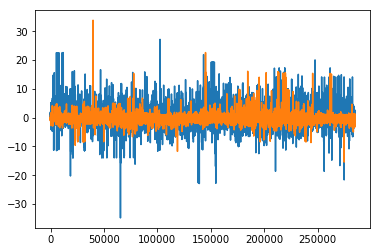

In [7]:
plt.plot(Fraud_Data[:,21])
plt.plot(Fraud_Data[:,28])

plt.show()

In [8]:
df = pd.read_csv('creditcard.csv')

Fraud data

In [9]:
data_df[data_df['Class']==1]

NameError: name 'data_df' is not defined

In [ ]:
df.count

Benign data

In [ ]:
data_df[data_df['Class']==0]

In [10]:
 np.linalg.svd(Fraud_Data, full_matrices=True)

MemoryError: 